In [1]:
from centigrad.nn import Module, Linear, ReLU
from centigrad.losses import HingeLoss
import numpy as np
import matplotlib.pyplot as plt

## Make up dataset

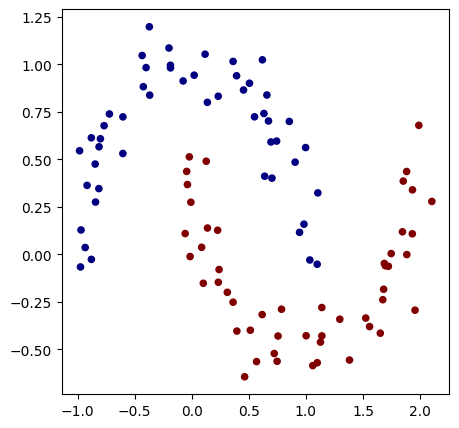

In [2]:
from sklearn.datasets import make_moons, make_blobs
xs, ys = make_moons(n_samples=100, noise=0.1)
ys = ys * 2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(xs[:, 0], xs[:, 1], c=ys, s=20, cmap='jet')

## Define Model

In [3]:
class NN(Module):
    def __init__(self):
        self.l1 = Linear(2, 16, low=-1.0)
        self.a1 = ReLU()
        self.l2 = Linear(16, 16, low=-1.0)
        self.a2 = ReLU()
        self.l3 = Linear(16, 1, low=-1.0)
    def forward(self, inputs: np.ndarray):
        out = self.l1.forward(inputs)
        out = self.a1.forward(out)
        out = self.l2.forward(out)
        out = self.a2.forward(out)
        out = self.l3.forward(out)
        return out
    def parameters(self):
        params = []
        params.extend(self.l1.parameters())
        params.extend(self.l2.parameters())
        params.extend(self.l3.parameters())
        return params
    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0.0
    def update(self, lr=0.1):
        for p in self.parameters():
            p.data -= lr * p.grad
    def regularize(self, alpha=1e-4):
        return alpha * np.sum([p*p for p in model.parameters()])

In [4]:
model = NN()
loss_function = HingeLoss()
losses, accuracies = [], []

## Training

In [5]:
for k in range(100):
    out = np.array([model.forward(x) for x in xs]).reshape(-1)
    loss = loss_function(out, ys)
    losses.append(loss.data)
    accuracy_batch = np.array([(ys > 0) == (out > 0)]).reshape(-1)
    accuracy = np.sum(accuracy_batch) / accuracy_batch.shape[0]
    accuracies.append(accuracy)
    model.zero_grad()
    loss.backward()
    model.update(lr=1.0 - 0.9*k/100)
    if k % 1 == 0: print(f"step {k} loss {loss.data}, accuracy {accuracy*100}%")

step 0 loss 1.754394108150861, accuracy 50.0%
step 1 loss 6.620968358381737, accuracy 50.0%
step 2 loss 0.7562165493400917, accuracy 53.0%
step 3 loss 0.4743362073789409, accuracy 79.0%
step 4 loss 0.3927295048302149, accuracy 80.0%
step 5 loss 0.329331277308034, accuracy 83.0%
step 6 loss 0.31744087056041564, accuracy 85.0%
step 7 loss 0.31015387128361743, accuracy 86.0%
step 8 loss 0.29207970082934276, accuracy 86.0%
step 9 loss 0.28301987374980303, accuracy 86.0%
step 10 loss 0.3034978475972802, accuracy 90.0%
step 11 loss 0.27760653076735786, accuracy 85.0%
step 12 loss 0.27399717997497, accuracy 91.0%
step 13 loss 0.250955172996126, accuracy 88.0%
step 14 loss 0.2512065689345226, accuracy 92.0%
step 15 loss 0.26236851195149585, accuracy 88.0%
step 16 loss 0.38687157505013026, accuracy 88.0%
step 17 loss 0.27160194885212713, accuracy 89.0%
step 18 loss 0.2126414591202035, accuracy 91.0%
step 19 loss 0.18605780707825567, accuracy 93.0%
step 20 loss 0.17951164298315392, accuracy 94.0

## Results

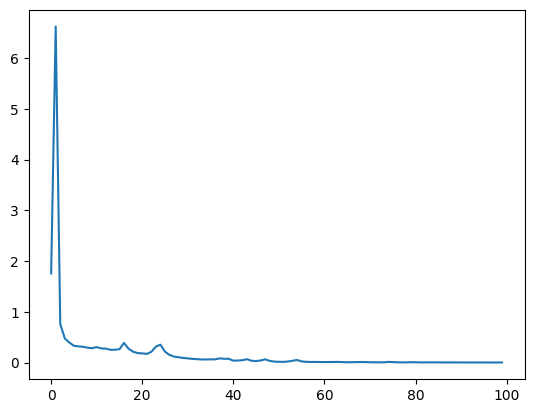

In [6]:
plt.plot(losses)

(-1.6447866463790441, 2.1052133536209556)

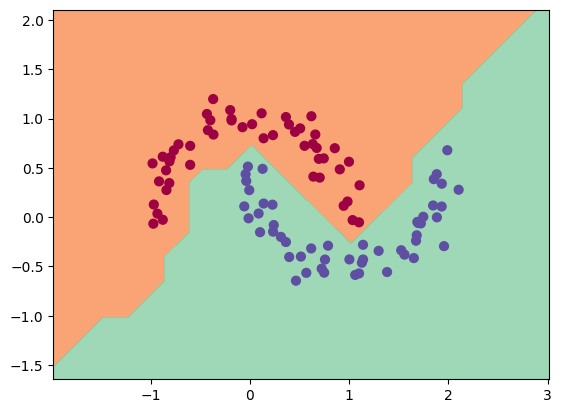

In [7]:
# visualize decision boundary

h = 0.25
x_min, x_max = xs[:, 0].min() - 1, xs[:, 0].max() + 1
y_min, y_max = xs[:, 1].min() - 1, xs[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
scores = np.array([model.forward(x) for x in Xmesh]).reshape(-1)
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(xs[:, 0], xs[:, 1], c=ys, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
